In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score

In [4]:
train_data = pd.read_csv('data/oasis_longitudinal.csv')

In [5]:
train_data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [6]:
del train_data['Subject ID']
del train_data['MRI ID']

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
Group       373 non-null object
Visit       373 non-null int64
MR Delay    373 non-null int64
M/F         373 non-null object
Hand        373 non-null object
Age         373 non-null int64
EDUC        373 non-null int64
SES         354 non-null float64
MMSE        371 non-null float64
CDR         373 non-null float64
eTIV        373 non-null int64
nWBV        373 non-null float64
ASF         373 non-null float64
dtypes: float64(5), int64(5), object(3)
memory usage: 38.0+ KB


In [8]:
train_data = train_data.dropna()

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 372
Data columns (total 13 columns):
Group       354 non-null object
Visit       354 non-null int64
MR Delay    354 non-null int64
M/F         354 non-null object
Hand        354 non-null object
Age         354 non-null int64
EDUC        354 non-null int64
SES         354 non-null float64
MMSE        354 non-null float64
CDR         354 non-null float64
eTIV        354 non-null int64
nWBV        354 non-null float64
ASF         354 non-null float64
dtypes: float64(5), int64(5), object(3)
memory usage: 38.7+ KB


In [10]:
# number of attack labels 
train_data['M/F'].value_counts()

F    204
M    150
Name: M/F, dtype: int64

In [11]:
# number of attack labels 
train_data['Group'].value_counts()

Nondemented    190
Demented       127
Converted       37
Name: Group, dtype: int64

In [12]:
# number of attack labels 
train_data['Hand'].value_counts()

R    354
Name: Hand, dtype: int64

In [13]:
train_data.to_csv('processed.csv')

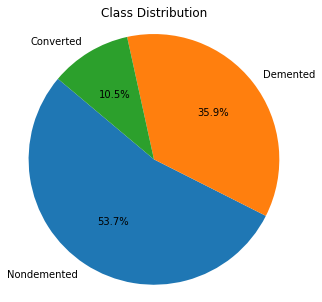

In [14]:
labels = train_data['Group'].value_counts().index
sizes = train_data['Group'].value_counts().values

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Class Distribution')
plt.show()

Text(0.5, 1, 'Correlation Matrix')

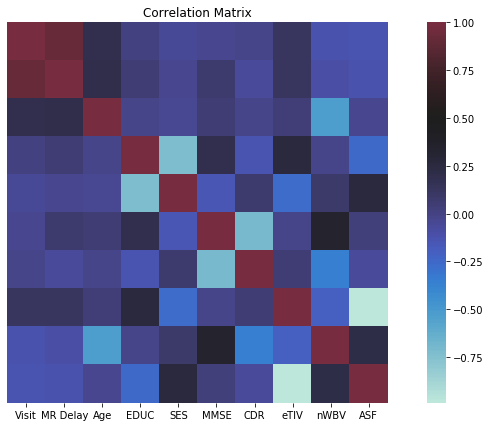

In [15]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(train_data.corr(), square=True, center=0.5, yticklabels=False).set_title('Correlation Matrix')

In [16]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
train_data['Group']= label_encoder.fit_transform(train_data['Group'])
train_data['M/F']= label_encoder.fit_transform(train_data['M/F'])
train_data['Hand']= label_encoder.fit_transform(train_data['Hand'])

train_data['Group'].unique()
train_data['M/F'].unique()
train_data['Hand'].unique()

array([0], dtype=int64)

In [17]:
X = train_data.drop(["Group"],axis =1)
y = train_data["Group"]

In [18]:
X.columns

Index(['Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR',
       'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [19]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [20]:
X_train.shape

(283, 12)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [22]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []


#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# NCA

In [23]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

nca = NeighborhoodComponentsAnalysis(random_state=42)
nca.fit(X, y)

NeighborhoodComponentsAnalysis(random_state=42)

# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model 
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X,y)

y_pred = knn.predict(X)

knn_acc = accuracy_score(y_pred, y)
knn_prec = precision_score(y_pred, y,average='weighted')
knn_rec = recall_score(y_pred, y,average='weighted')
knn_f1 = f1_score(y_pred, y,average='weighted')

In [25]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1)

In [26]:
knn_nca = KNeighborsClassifier(n_neighbors=3)
knn_nca.fit(nca.transform(X), y)

y_pred = knn_nca.predict(nca.transform(X))

knn1_acc = accuracy_score(y_pred, y)
knn1_prec = precision_score(y_pred, y,average='weighted')
knn1_rec = recall_score(y_pred, y,average='weighted')
knn1_f1 = f1_score(y_pred, y,average='weighted')

In [27]:
storeResults('KNN-NCA',knn1_acc,knn1_prec,knn1_rec,knn1_f1)

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(random_state=10)

tree.fit(X,y)

y_pred = tree.predict(X)

dt_acc = accuracy_score(y_pred, y)
dt_prec = precision_score(y_pred, y,average='weighted')
dt_rec = recall_score(y_pred, y,average='weighted')
dt_f1 = f1_score(y_pred, y,average='weighted')

In [29]:
storeResults('Decision Tree',dt_acc,dt_prec,dt_rec,dt_f1)

In [30]:
tree_nca = DecisionTreeClassifier(random_state=10)
tree_nca.fit(nca.transform(X), y)

y_pred = tree_nca.predict(nca.transform(X))

dt1_acc = accuracy_score(y_pred, y)
dt1_prec = precision_score(y_pred, y,average='weighted')
dt1_rec = recall_score(y_pred, y,average='weighted')
dt1_f1 = f1_score(y_pred, y,average='weighted')

In [31]:
storeResults('Decision Tree - NCA',dt1_acc,dt1_prec,dt1_rec,dt1_f1)

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
forest = RandomForestClassifier(max_depth=2, random_state=0)

forest.fit(X,y)

y_pred = forest.predict(X)

rf_acc = accuracy_score(y_pred, y)
rf_prec = precision_score(y_pred, y,average='weighted')
rf_rec = recall_score(y_pred, y,average='weighted')
rf_f1 = f1_score(y_pred, y,average='weighted')

In [33]:
storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1)

In [34]:
forest_nca = RandomForestClassifier(max_depth=2, random_state=0)
forest_nca.fit(nca.transform(X), y)

y_pred = forest_nca.predict(nca.transform(X))

rf1_acc = accuracy_score(y_pred, y)
rf1_prec = precision_score(y_pred, y,average='weighted')
rf1_rec = recall_score(y_pred, y,average='weighted')
rf1_f1 = f1_score(y_pred, y,average='weighted')

In [35]:
storeResults('Random Forest - NCA',rf1_acc,rf1_prec,rf1_rec,rf1_f1)

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

# instantiate the model 
lr = LogisticRegression(random_state=0)

lr.fit(X,y)

y_pred = lr.predict(X)

lr_acc = accuracy_score(y_pred, y)
lr_prec = precision_score(y_pred, y,average='weighted')
lr_rec = recall_score(y_pred, y,average='weighted')
lr_f1 = f1_score(y_pred, y,average='weighted')

In [37]:
storeResults('Logistic Regression',lr_acc,lr_prec,lr_rec,lr_f1)

In [38]:
lr_nca = RandomForestClassifier(max_depth=2, random_state=0)
lr_nca.fit(nca.transform(X), y)

y_pred = lr_nca.predict(nca.transform(X))

lr1_acc = accuracy_score(y_pred, y)
lr1_prec = precision_score(y_pred, y,average='weighted')
lr1_rec = recall_score(y_pred, y,average='weighted')
lr1_f1 = f1_score(y_pred, y,average='weighted')

In [39]:
storeResults('Logistic Regression - NCA',lr1_acc,lr1_prec,lr1_rec,lr1_f1)

# AdaBoost

In [40]:
from sklearn.ensemble import AdaBoostClassifier

# instantiate the model 
ada = AdaBoostClassifier(n_estimators=100, random_state=0)

ada.fit(X,y)

y_pred = ada.predict(X)

ab_acc = accuracy_score(y_pred, y)
ab_prec = precision_score(y_pred, y,average='weighted')
ab_rec = recall_score(y_pred, y,average='weighted')
ab_f1 = f1_score(y_pred, y,average='weighted')

In [41]:
storeResults('AdaBoost',ab_acc,ab_prec,ab_rec,ab_f1)

In [42]:
ada_nca = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_nca.fit(nca.transform(X), y)

y_pred = ada_nca.predict(nca.transform(X))

ab1_acc = accuracy_score(y_pred, y)
ab1_prec = precision_score(y_pred, y,average='weighted')
ab1_rec = recall_score(y_pred, y,average='weighted')
ab1_f1 = f1_score(y_pred, y,average='weighted')

In [43]:
storeResults('AdaBoost - NCA',ab1_acc,ab1_prec,ab1_rec,ab1_f1)

# MLP

In [44]:
from sklearn.neural_network import MLPClassifier

# instantiate the model 
mlp = MLPClassifier(random_state=1, max_iter=30)

mlp.fit(X,y)

y_pred = mlp.predict(X)

mlp_acc = accuracy_score(y_pred, y)
mlp_prec = precision_score(y_pred, y,average='weighted')
mlp_rec = recall_score(y_pred, y,average='weighted')
mlp_f1 = f1_score(y_pred, y,average='weighted')

In [45]:
storeResults('MLP',mlp_acc,mlp_prec,mlp_rec,mlp_f1)

In [46]:
mlp_nca = MLPClassifier(random_state=1, max_iter=30)
mlp_nca.fit(nca.transform(X), y)

y_pred = mlp_nca.predict(nca.transform(X))

mlp1_acc = accuracy_score(y_pred, y)
mlp1_prec = precision_score(y_pred, y,average='weighted')
mlp1_rec = recall_score(y_pred, y,average='weighted')
mlp1_f1 = f1_score(y_pred, y,average='weighted')

In [47]:
storeResults('MLP - NCA',mlp1_acc,mlp1_prec,mlp1_rec,mlp1_f1)

# Voting Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)

eclf1 = VotingClassifier(estimators=[('ad', clf1), ('rf', clf2)], voting='soft')
eclf1.fit(X,y)

y_pred = eclf1.predict(X)

vot_acc = accuracy_score(y_pred, y)
vot_prec = precision_score(y_pred, y,average='weighted')
vot_rec = recall_score(y_pred, y,average='weighted')
vot_f1 = f1_score(y_pred, y,average='weighted')

In [49]:
storeResults('Voting CLassifier',vot_acc,vot_prec,vot_rec,vot_f1)

In [50]:
vot_nca = VotingClassifier(estimators=[('ad', clf1), ('rf', clf2)], voting='soft')
vot_nca.fit(nca.transform(X), y)

y_pred = vot_nca.predict(nca.transform(X))

vot1_acc = accuracy_score(y_pred, y)
vot1_prec = precision_score(y_pred, y,average='weighted')
vot1_rec = recall_score(y_pred, y,average='weighted')
vot1_f1 = f1_score(y_pred, y,average='weighted')

In [51]:
storeResults('Voting CLassifier - NCA',vot1_acc,vot1_prec,vot1_rec,vot1_f1)

# Comparison

In [52]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1score
                      })

In [53]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.726,0.721,0.726,0.721
1,KNN-NCA,0.749,0.743,0.749,0.744
2,Decision Tree,1.000,1.000,1.000,1.000
3,Decision Tree - NCA,1.000,1.000,1.000,1.000
4,Random Forest,0.890,0.994,0.890,0.939
5,Random Forest - NCA,0.624,0.854,0.624,0.692
6,Logistic Regression,0.706,0.816,0.706,0.748
7,Logistic Regression - NCA,0.624,0.854,0.624,0.692
8,AdaBoost,0.712,0.745,0.712,0.671
9,AdaBoost - NCA,0.698,0.721,0.698,0.705


# Modelling

In [55]:
import joblib
filename = 'model1.sav'
joblib.dump(eclf1, filename)


['model1.sav']

# Graph

In [56]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

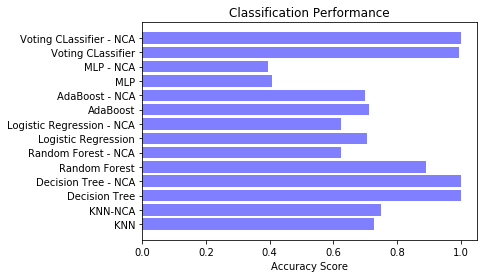

In [57]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

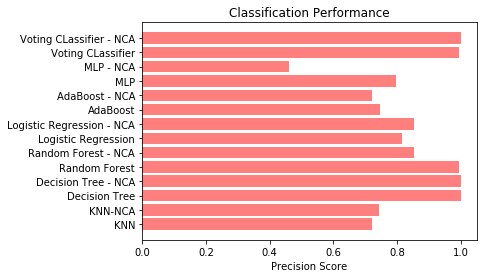

In [58]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

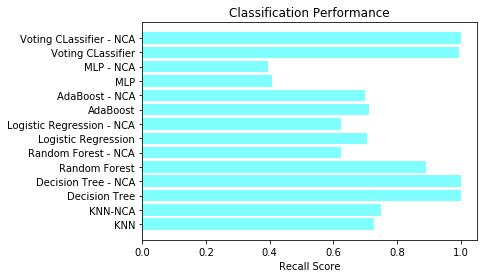

In [59]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

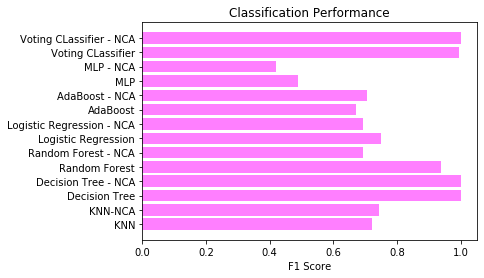

In [60]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()